In [1]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large
Z_{n+1} = Z_{n}^{1.5 * Z_{n}^{\sqrt{-1} * (p_{1}^{1.5 * Z_{n}^{p_{2}}})}}
\qquad \qquad \small p = [2.76544+0.997995j, 50.1518+7.53287j]
\end{eqnarray}""")

<IPython.core.display.Latex object>

### numerical discovery - this may actually be what an unborn Unicorn looks like.
    Sequential iteration of difference equation:
    Z = Z^(1.5 * Z^(i * p(1)^(1.5 * Z^p(2)))
    
    with parameter set:
    p = [2.76544+0.997995j, 50.1518+7.53287j]
    
    on the complex plane computes this organic graphic.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

In [3]:
def unicorn_in_utero(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number # p = [2.76544+0.997995j, 50.1518+7.53287j]
    Returns:
        Z:    the result (complex)
    """
    Z = Z**(1.5 * Z**(1j * p[0]**(1.5 * Z**p[1])))
    return Z

In [4]:
#                                        -- machine with 8 cores --
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = -0.25 + 0.0*1j
par_set['theta'] = 0.0
par_set['zoom'] = 5/8

par_set['it_max'] = 64
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = [2.76544+0.997995j, 50.1518+7.53287j]

list_tuple = [(unicorn_in_utero, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
tt = time.time() - t0
print(tt, '\t total time')

19.687302112579346 	 total time


In [5]:
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
tt = time.time() - t0
print('converstion time =\t',tt)

converstion time =	 1.2275488376617432


coloring time =	 3.5901389122009277


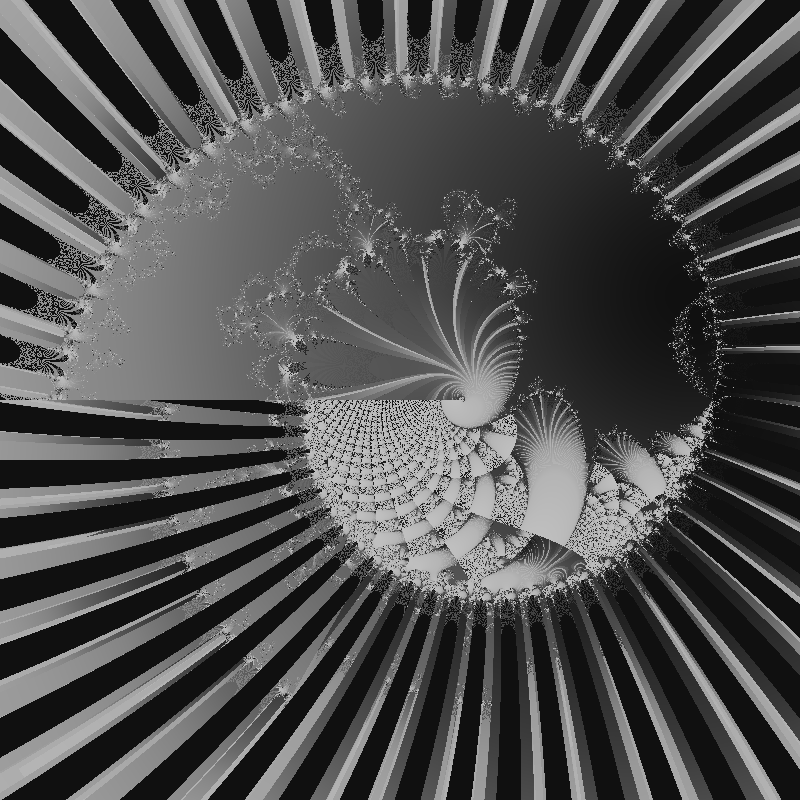

In [6]:
t0 = time.time()
D = ncp.mat_to_gray(Zd, max_v=193, min_v=16)
tt = time.time() - t0
print('coloring time =\t',tt)

display(D)

coloring time =	 3.53934907913208


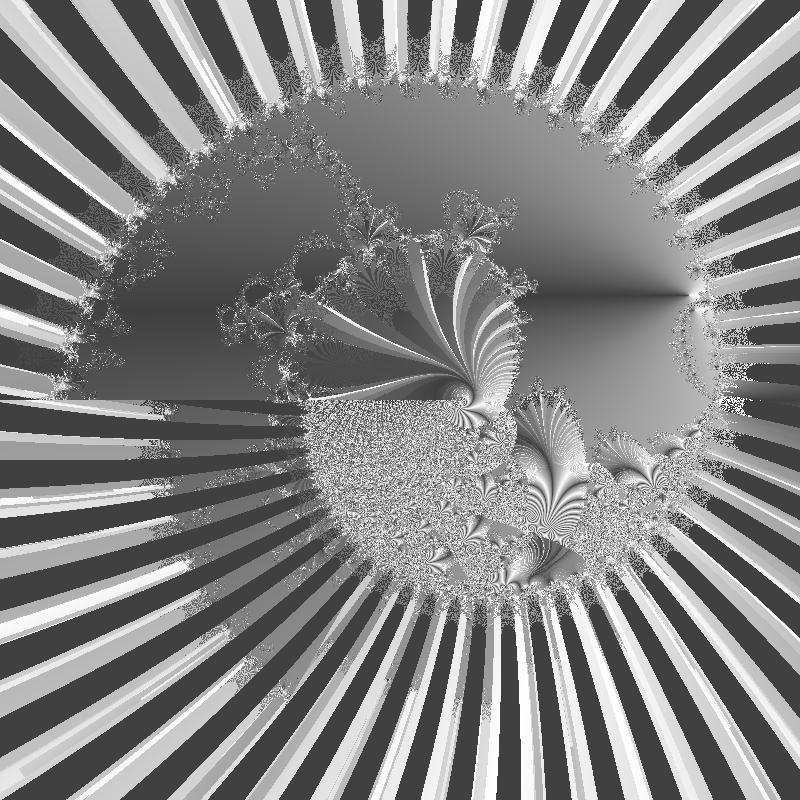

In [7]:
t0 = time.time()
R = ncp.mat_to_gray(Zr, max_v=255, min_v=64)
tt = time.time() - t0
print('coloring time =\t',tt)
display(R)

coloring time =	 3.569756031036377


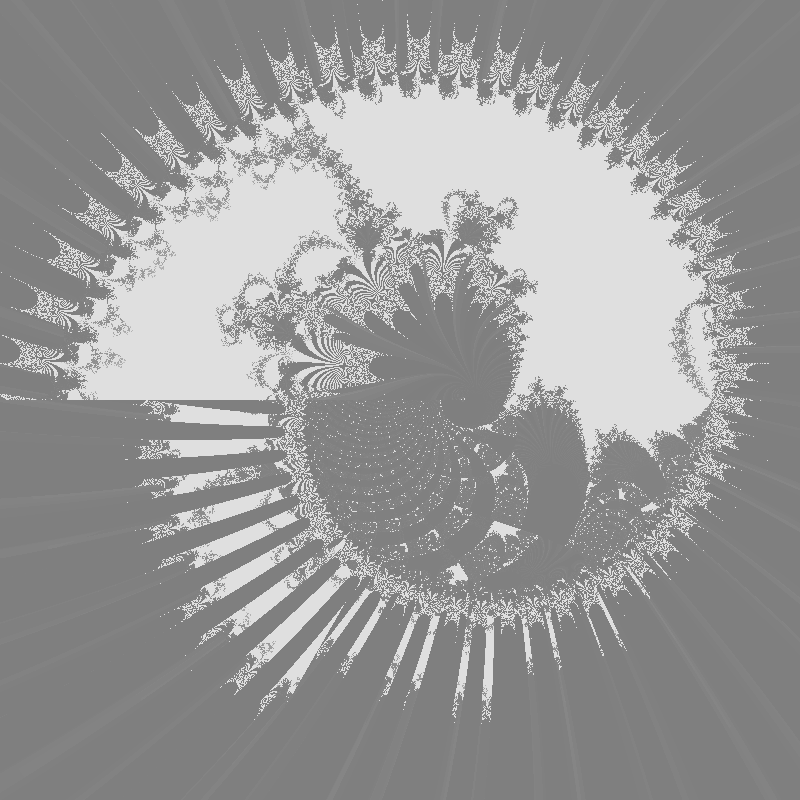

In [8]:
t0 = time.time()
ETG = ncp.mat_to_gray(ETn, max_v=223, min_v=127)
tt = time.time() - t0
print('coloring time =\t',tt)
display(ETG)

coloring time:	 5.265304088592529


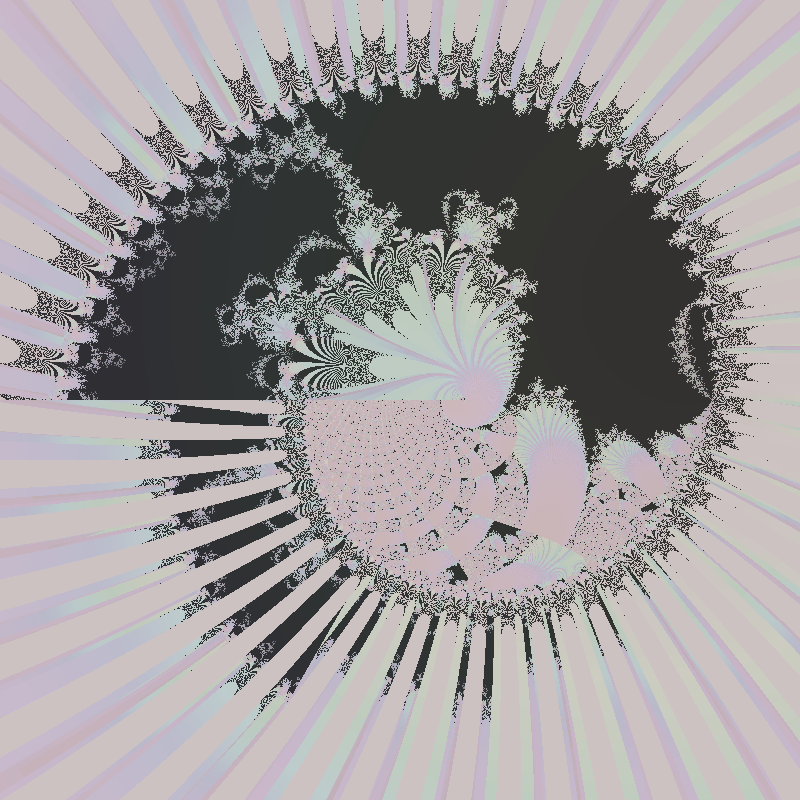

In [19]:
# Available Products: Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
H = Zd
S = Zd
V = 1 - ETn

Hue_width = 1.0

H_min=0.0
H_max=H_min+Hue_width

S_max=0.05
S_min=0.05

V_max=0.8
V_min=0.2
t0 = time.time()
I = ncp.normat_hsv_intrgb(H, S, V, H_max, H_min, S_max, S_min, V_max, V_min)
print('coloring time:\t',time.time() - t0)
display(I)


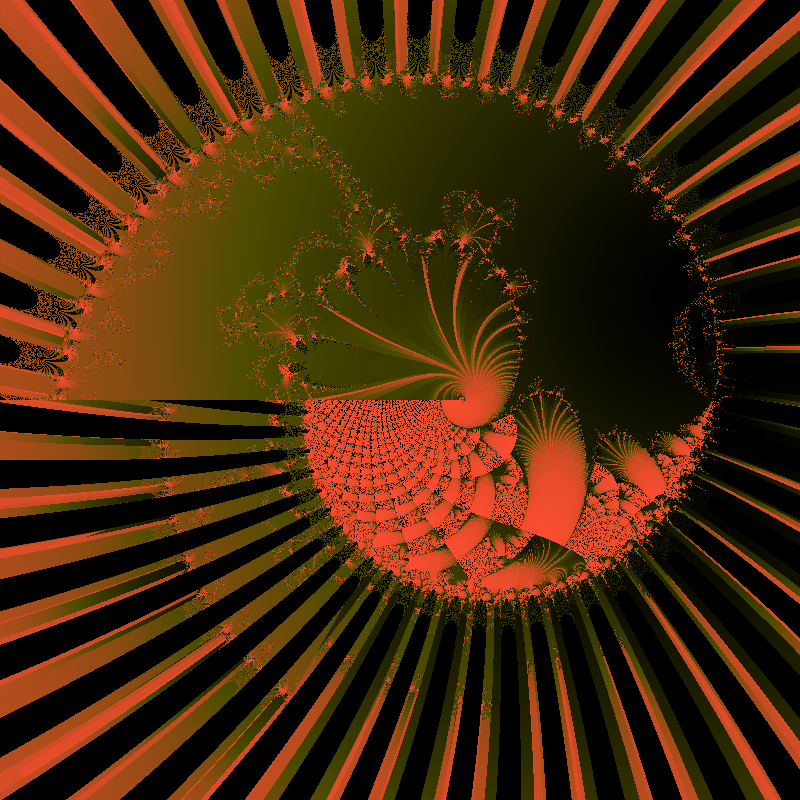

In [8]:
mp0 = np.array([[0,0,0],[0.3,0.3,0.0],[1.0,0.3,0.2]])
I_mapped = ncp.mat_to_mapped(Zd, mp0)
display(I_mapped)

In [35]:
V_bad = Zd
V_g = 1-Zd

In [36]:
print(V_bad.max(), V_bad.min())
print(V_g.max(), V_g.min())

1.0 0.0
1.0 0.0


In [39]:
print((V_bad < 0.1).sum())

639992
